In [1]:
import os
import cv2
import numpy as np
from time import time
import matplotlib.pyplot as plt
import copy 
import random
#from skimage import io
import math

#File Upload
husk at filerne skal være samme størrelse

Refrence image

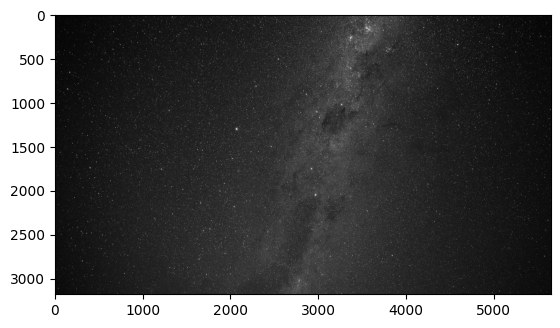

In [82]:
#read image
refIm = cv2.imread('input image cropped.png')
refIm = cv2.cvtColor(refIm, cv2.COLOR_RGB2GRAY)
#show image
plt.imshow(cv2.cvtColor(refIm, cv2.COLOR_BGR2RGB))

Test image

In [83]:
#read image
testIm = cv2.imread('Stacked test DSS.png')
filepaths = [];
print(refIm.shape)
imHeight = refIm.shape[0]
imWidth = refIm.shape[1]
image = cv2.cvtColor(testIm, cv2.COLOR_RGB2GRAY)
print(image.shape)
for x in range(0,image.shape[1],imWidth):
    for y in range(0,image.shape[0],imHeight):
        s = os.getcwd()+"\\temp\\"+"image"+str(x)+"_"+str(y)+".png";
        i = image.copy()[y:y+imHeight, x:x+imWidth]
        #print(s," ",i.shape)
        if(i.shape[0]!= 0 and i.shape[1]!= 0):
            cv2.imwrite(s,i)
            filepaths.append(s);

        #filepaths.append(s);
        #show image
        #plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))




(3180, 5654)
(3795, 5763)


#Functioner


In [37]:
def signaltonoise(a, axis=0, ddof=0):
    a = np.asanyarray(a)
    m = a.mean(axis)
    sd = a.std(axis=axis, ddof=ddof)
    return np.where(sd == 0, 0, m/sd)

#Udrening

In [86]:
psnrlist = []
snrlist = []

for x in range(len(filepaths)):
  image = cv2.imread(filepaths[x])
  image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  #cv2_imshow(image)
  #print(image.shape)
  #print(refIm.shape)
  if (image.shape[0] == refIm.shape[0] and image.shape[1] == refIm.shape[1]):
    p = cv2.PSNR(image, refIm,255)
    #print("PSNR: " + str(p));
    psnrlist.append(p)
    s = signaltonoise(image, axis=None)
    #print("SNR: "+str(s));
    snrlist.append(s)

#print(str(sum(psnrlist)))

#print('List len: ' + str(len(filepaths)))
if (len(psnrlist) > 1):
  print('PSNR avg: ' + str(sum(psnrlist) / len(psnrlist)))
else:
  print('PSNR : ' + str(psnrlist[0]))
  
if (len(snrlist) > 1):
  print('SNR avg: ' + str(sum(snrlist) / len(snrlist)))
else:
  print('SNR : ' + str(snrlist[0]))

PSNR : 13.72374089069491
SNR : 2.760395547703638


In [ ]:
)
print('PSNR avg: ' + str(sum(psnrlist) / len(psnrlist)))
print('SNR avg: ' + str(sum(snrlist) / len(snrlist)))

In [ ]:
)
print('PSNR avg: ' + str(sum(psnrlist) / len(psnrlist)))
print('SNR avg: ' + str(sum(snrlist) / len(snrlist)))